In [1]:
from graphviz import Digraph

def create_architecture_diagram():
    dot = Digraph(comment='fMRI-GAT Architecture', format='png')
    dot.attr(rankdir='LR', splines='ortho', fontsize='12')

    # --- Input Data Cluster ---
    with dot.subgraph(name='cluster_0') as c:
        c.attr(label='1. Feature Engineering', style='dashed', color='grey')

        # fMRI Branch
        c.node('A', 'Raw fMRI\n(8968, 423)', shape='cylinder', style='filled', fillcolor='#E3F2FD')
        c.node('B', 'Sliding Window\n(20 TRs)', shape='box')
        c.node('C', '1D-CNN Encoder\n(Time-Series)', shape='component', style='filled', fillcolor='#FFF9C4')
        c.node('D', 'fMRI Embeddings\n(423, 32)', shape='parallelogram')

        c.edge('A', 'B')
        c.edge('B', 'C')
        c.edge('C', 'D')

        # Stimuli Branch
        c.node('E', 'Stimuli Words', shape='cylinder', style='filled', fillcolor='#E3F2FD')
        c.node('F', 'Embedding\n(FastText/GPT2)', shape='box')
        c.node('G', 'FIR (Lags 2-4)\n+ Std + PCA', shape='box')
        c.node('H', 'Word Features\n(1, D_pca)', shape='parallelogram')

        c.edge('E', 'F')
        c.edge('F', 'G')
        c.edge('G', 'H')

        # Fusion
        c.node('I', 'Concatenate\n& Broadcast', shape='circle')
        c.node('J', 'Node Features X_t\n(423, Total_Dim)', shape='box', style='filled', fillcolor='#C8E6C9', penwidth='2')

        c.edge('D', 'I')
        c.edge('H', 'I')
        c.edge('I', 'J')

    # --- Graph Construction Cluster ---
    with dot.subgraph(name='cluster_1') as c:
        c.attr(label='2. Graph Topology', style='dashed', color='grey')
        c.node('K', 'FC Matrix', shape='box')
        c.node('L', 'Threshold & Binarize', shape='box')
        c.node('M', 'Edge Indices\n(Static)', shape='box', style='filled', fillcolor='#C8E6C9')

        c.edge('K', 'L')
        c.edge('L', 'M')

    # --- Model Cluster ---
    with dot.subgraph(name='cluster_2') as c:
        c.attr(label='3. Spatio-Temporal GAT', style='filled', color='#F5F5F5')

        c.node('N', 'GATv2 Layer 1\n(4 Heads, 64 Hidden)', shape='box', style='filled', fillcolor='#FFCCBC')
        c.node('O', 'GATv2 Layer 2\n(4 Heads, 32 Hidden)', shape='box', style='filled', fillcolor='#FFCCBC')
        c.node('P', 'Residual Connection\n(Input + GAT Output)', shape='diamond')
        c.node('Q', 'Linear Regression\nHead', shape='invtrapezium')

        c.edge('J', 'N', label='Input Graph')
        c.edge('M', 'N')
        c.edge('N', 'O')
        c.edge('O', 'P')
        c.edge('P', 'Q')

    # --- Output Cluster ---
    with dot.subgraph(name='cluster_3') as c:
        c.attr(label='4. Output & Training', style='dashed', color='grey')

        c.node('R', 'Predicted BOLD\n Y_t+1', shape='oval', style='filled', fillcolor='#D1C4E9')
        c.node('S', 'Ground Truth\n Y_t+1', shape='oval')
        c.node('T', 'Loss Function\na.MSE loss\nb.Neg Pearson', shape='doublecircle')

        c.edge('Q', 'R')
        c.edge('R', 'T')
        c.edge('S', 'T')

    # Save and render
    output_filename = 'fMRI_GAT_Architecture'
    dot.render(output_filename, view=False)
    print(f"Diagram saved as {output_filename}.png")

try:
    create_architecture_diagram()
except Exception as e:
    print("Graphviz executable not found. Please install Graphviz or use the Mermaid diagram above.")

Diagram saved as fMRI_GAT_Architecture.png


In [4]:
import graphviz
dot = graphviz.Digraph('round-table', comment='The Round Table')
dot


In [5]:
dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

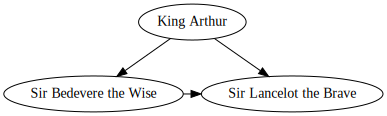

In [6]:
dot

Diagram saved as fMRI_GAT_Vertical.png


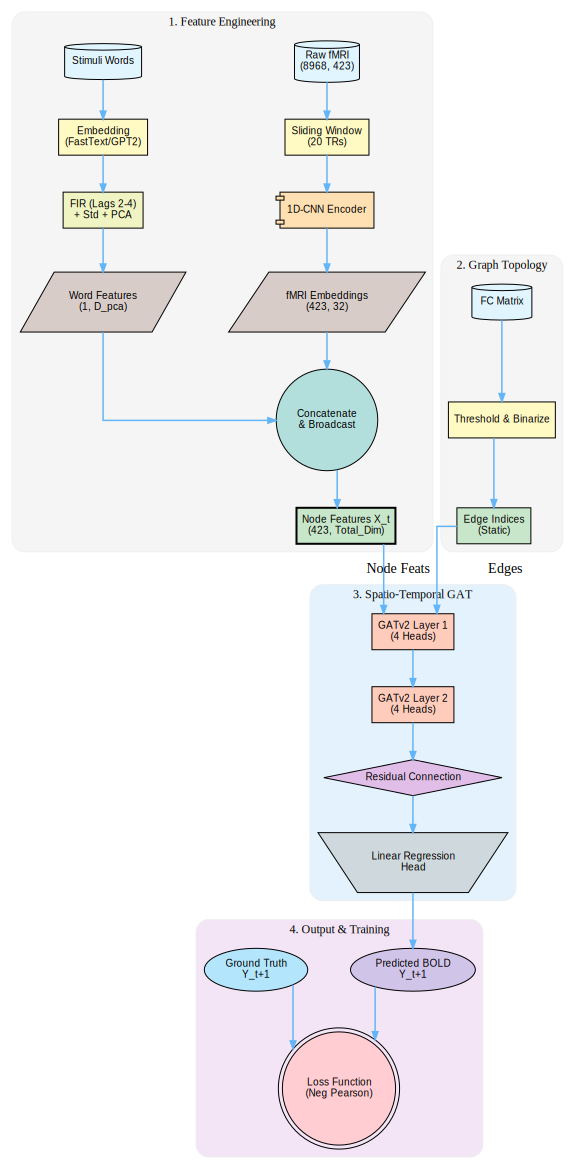

In [8]:
from graphviz import Digraph

def create_vertical_architecture_diagram():
    # Initialize Graph with Vertical Layout (TB = Top-to-Bottom)
    dot = Digraph(comment='fMRI-GAT Architecture Vertical', format='png')

    # Global Graph Attributes for Vertical Layout & Compactness
    dot.attr(rankdir='TB',
             splines='ortho',
             fontsize='12',
             nodesep='0.6', # Controls horizontal spacing
             ranksep='0.5', # Controls vertical spacing
             bgcolor='white')

    # Global Edge Attributes (Light Bluish arrows)
    dot.attr('edge', color='#64B5F6', penwidth='1.5', arrowsize='0.8')

    # Global Node Attributes (Filled style)
    dot.attr('node', style='filled', fontname='Arial', fontsize='10')

    # --- 1. Feature Engineering Cluster ---
    with dot.subgraph(name='cluster_0') as c:
        c.attr(label='1. Feature Engineering', style='rounded,filled', color='#ECEFF1', fillcolor='#F5F5F5')

        # Mild Color Palette
        c.node('A', 'Raw fMRI\n(8968, 423)', shape='cylinder', fillcolor='#E1F5FE') # Mild Blue
        c.node('B', 'Sliding Window\n(20 TRs)', shape='box', fillcolor='#FFF9C4')   # Mild Yellow
        c.node('C', '1D-CNN Encoder', shape='component', fillcolor='#FFE0B2')       # Mild Orange
        c.node('D', 'fMRI Embeddings\n(423, 32)', shape='parallelogram', fillcolor='#D7CCC8') # Mild Brown

        c.node('E', 'Stimuli Words', shape='cylinder', fillcolor='#E1F5FE')
        c.node('F', 'Embedding\n(FastText/GPT2)', shape='box', fillcolor='#FFF9C4')
        c.node('G', 'FIR (Lags 2-4)\n+ Std + PCA', shape='box', fillcolor='#F0F4C3') # Mild Lime
        c.node('H', 'Word Features\n(1, D_pca)', shape='parallelogram', fillcolor='#D7CCC8')

        c.node('I', 'Concatenate\n& Broadcast', shape='circle', fillcolor='#B2DFDB') # Mild Teal
        c.node('J', 'Node Features X_t\n(423, Total_Dim)', shape='box', fillcolor='#C8E6C9', penwidth='2') # Mild Green

        # Internal Edges
        c.edge('A', 'B')
        c.edge('B', 'C')
        c.edge('C', 'D')
        c.edge('E', 'F')
        c.edge('F', 'G')
        c.edge('G', 'H')
        c.edge('D', 'I')
        c.edge('H', 'I')
        c.edge('I', 'J')

    # --- 2. Graph Topology Cluster ---
    with dot.subgraph(name='cluster_1') as c:
        c.attr(label='2. Graph Topology', style='rounded,filled', color='#ECEFF1', fillcolor='#F5F5F5')

        c.node('K', 'FC Matrix', shape='cylinder', fillcolor='#E1F5FE')
        c.node('L', 'Threshold & Binarize', shape='box', fillcolor='#FFF9C4')
        c.node('M', 'Edge Indices\n(Static)', shape='box', fillcolor='#C8E6C9')

        c.edge('K', 'L')
        c.edge('L', 'M')

    # --- 3. Model Cluster ---
    with dot.subgraph(name='cluster_2') as c:
        c.attr(label='3. Spatio-Temporal GAT', style='rounded,filled', color='#ECEFF1', fillcolor='#E3F2FD') # Light Blue bg

        c.node('N', 'GATv2 Layer 1\n(4 Heads)', shape='box', fillcolor='#FFCCBC') # Mild Red/Orange
        c.node('O', 'GATv2 Layer 2\n(4 Heads)', shape='box', fillcolor='#FFCCBC')
        c.node('P', 'Residual Connection', shape='diamond', fillcolor='#E1BEE7') # Mild Purple
        c.node('Q', 'Linear Regression\nHead', shape='invtrapezium', fillcolor='#CFD8DC') # Mild Grey

        c.edge('N', 'O')
        c.edge('O', 'P')
        c.edge('P', 'Q')

    # --- 4. Output & Training Cluster ---
    with dot.subgraph(name='cluster_3') as c:
        c.attr(label='4. Output & Training', style='rounded,filled', color='#ECEFF1', fillcolor='#F3E5F5') # Light Purple bg

        c.node('R', 'Predicted BOLD\n Y_t+1', shape='oval', fillcolor='#D1C4E9') # Mild Deep Purple
        c.node('S', 'Ground Truth\n Y_t+1', shape='oval', fillcolor='#B3E5FC')   # Mild Blue
        c.node('T', 'Loss Function\n(Neg Pearson)', shape='doublecircle', fillcolor='#FFCDD2') # Mild Red

        c.edge('R', 'T')
        c.edge('S', 'T')

    # --- Connections Between Clusters ---
    dot.edge('J', 'N', label='Node Feats')
    dot.edge('M', 'N', label='Edges')
    dot.edge('Q', 'R')

    # Save and render
    output_filename = 'fMRI_GAT_Vertical'
    dot.render(output_filename, view=False)
    print(f"Diagram saved as {output_filename}.png")
    display(dot)

try:
    create_vertical_architecture_diagram()
except Exception as e:
    print("Graphviz executable not found. Please install Graphviz to generate the PNG.")


In [9]:
from graphviz import Digraph

# --- Common Style Settings ---
def apply_styles(dot):
    dot.attr(rankdir='TB', splines='ortho', fontsize='12', nodesep='0.6', ranksep='0.5', bgcolor='white')
    dot.attr('edge', color='#64B5F6', penwidth='1.5', arrowsize='0.8')
    dot.attr('node', style='filled', fontname='Arial', fontsize='10')

# ==========================================
# PART 1: Feature Engineering + Graph Topology
# ==========================================
def create_part1_diagram():
    dot = Digraph(comment='fMRI-GAT Part 1', format='png')
    apply_styles(dot)

    # --- Feature Engineering Cluster ---
    with dot.subgraph(name='cluster_0') as c:
        c.attr(label='1. Feature Engineering', style='rounded,filled', color='#ECEFF1', fillcolor='#F5F5F5')

        c.node('A', 'Raw fMRI\n(8968, 423)', shape='cylinder', fillcolor='#E1F5FE')
        c.node('B', 'Sliding Window\n(20 TRs)', shape='box', fillcolor='#FFF9C4')
        c.node('C', '1D-CNN Encoder', shape='component', fillcolor='#FFE0B2')
        c.node('D', 'fMRI Embeddings\n(423, 32)', shape='parallelogram', fillcolor='#D7CCC8')

        c.node('E', 'Stimuli Words', shape='cylinder', fillcolor='#E1F5FE')
        c.node('F', 'Embedding\n(FastText/GPT2)', shape='box', fillcolor='#FFF9C4')
        c.node('G', 'FIR (Lags 2-4)\n+ Std + PCA', shape='box', fillcolor='#F0F4C3')
        c.node('H', 'Word Features\n(1, D_pca)', shape='parallelogram', fillcolor='#D7CCC8')

        c.node('I', 'Concatenate\n& Broadcast', shape='circle', fillcolor='#B2DFDB')
        c.node('J', 'Node Features X_t\n(423, Total_Dim)', shape='box', fillcolor='#C8E6C9', penwidth='2')

        # Edges
        c.edge('A', 'B')
        c.edge('B', 'C')
        c.edge('C', 'D')
        c.edge('E', 'F')
        c.edge('F', 'G')
        c.edge('G', 'H')
        c.edge('D', 'I')
        c.edge('H', 'I')
        c.edge('I', 'J')

    # --- Graph Topology Cluster ---
    with dot.subgraph(name='cluster_1') as c:
        c.attr(label='2. Graph Topology', style='rounded,filled', color='#ECEFF1', fillcolor='#F5F5F5')

        c.node('K', 'FC Matrix', shape='cylinder', fillcolor='#E1F5FE')
        c.node('L', 'Threshold & Binarize', shape='box', fillcolor='#FFF9C4')
        c.node('M', 'Edge Indices\n(Static)', shape='box', fillcolor='#C8E6C9')

        c.edge('K', 'L')
        c.edge('L', 'M')

    dot.render('fMRI_GAT_Part1', view=False)
    print("Part 1 diagram saved as fMRI_GAT_Part1.png")

# ==========================================
# PART 2: GAT Model + Output & Training
# ==========================================
def create_part2_diagram():
    dot = Digraph(comment='fMRI-GAT Part 2', format='png')
    apply_styles(dot)

    # --- Input Placeholders (For Manual Connection) ---
    with dot.subgraph(name='cluster_inputs') as c:
        c.attr(style='invis') # Invisible cluster for layout
        c.node('Input_J', 'Input: Node Features', shape='invhouse', style='dashed,filled', fillcolor='#E0F2F1')
        c.node('Input_M', 'Input: Adjacency', shape='invhouse', style='dashed,filled', fillcolor='#E0F2F1')

    # --- Model Cluster ---
    with dot.subgraph(name='cluster_2') as c:
        c.attr(label='3. Spatio-Temporal GAT', style='rounded,filled', color='#ECEFF1', fillcolor='#E3F2FD')

        c.node('N', 'GATv2 Layer 1\n(4 Heads)', shape='box', fillcolor='#FFCCBC')
        c.node('O', 'GATv2 Layer 2\n(4 Heads)', shape='box', fillcolor='#FFCCBC')
        c.node('P', 'Residual Connection', shape='diamond', fillcolor='#E1BEE7')
        c.node('Q', 'Linear Regression\nHead', shape='invtrapezium', fillcolor='#CFD8DC')

        # Internal Edges
        c.edge('N', 'O')
        c.edge('O', 'P')
        c.edge('P', 'Q')

    # --- Output & Training Cluster ---
    with dot.subgraph(name='cluster_3') as c:
        c.attr(label='4. Output & Training', style='rounded,filled', color='#ECEFF1', fillcolor='#F3E5F5')

        c.node('R', 'Predicted BOLD\n Y_t+1', shape='oval', fillcolor='#D1C4E9')
        c.node('S', 'Ground Truth\n Y_t+1', shape='oval', fillcolor='#B3E5FC')
        c.node('T', 'Loss Function\n(Neg Pearson)', shape='doublecircle', fillcolor='#FFCDD2')

        c.edge('R', 'T')
        c.edge('S', 'T')

    # --- Connections ---
    # From Placeholders to Model
    dot.edge('Input_J', 'N')
    dot.edge('Input_M', 'N')

    # From Model to Output
    dot.edge('Q', 'R')

    dot.render('fMRI_GAT_Part2', view=False)
    print("Part 2 diagram saved as fMRI_GAT_Part2.png")

# Generate both diagrams
try:
    create_part1_diagram()
    create_part2_diagram()
except Exception as e:
    print("Graphviz executable not found. Please install Graphviz to generate the PNGs.")

Part 1 diagram saved as fMRI_GAT_Part1.png
Part 2 diagram saved as fMRI_GAT_Part2.png


In [10]:
from graphviz import Digraph

def create_inverted_part2_diagram():
    dot = Digraph(comment='fMRI-GAT Part 2 Inverted', format='png')

    # --- Global Settings: Bottom-to-Top Flow ---
    dot.attr(rankdir='BT',  # Bottom-to-Top orientation
             splines='ortho',
             fontsize='12',
             nodesep='0.6',
             ranksep='0.5',
             bgcolor='white')

    # Blue edges and pastel node styles
    dot.attr('edge', color='#64B5F6', penwidth='1.5', arrowsize='0.8')
    dot.attr('node', style='filled', fontname='Arial', fontsize='10')

    # --- 1. Input Placeholders (Now at the Bottom) ---
    with dot.subgraph(name='cluster_inputs') as c:
        c.attr(style='invis')
        # Mild Teal for Inputs
        c.node('Input_J', 'Input: Node Features\n(from Part 1)', shape='box', style='dashed,filled', fillcolor='#E0F2F1')
        c.node('Input_M', 'Input: Edge Indices\n(from Part 1)', shape='box', style='dashed,filled', fillcolor='#E0F2F1')

    # --- 2. Spatio-Temporal GAT Model ---
    with dot.subgraph(name='cluster_model') as c:
        c.attr(label='3. Spatio-Temporal GAT Model', style='rounded,filled', color='#ECEFF1', fillcolor='#E3F2FD')

        # Mild Red/Orange for Attention Layers
        c.node('N', 'GATv2 Layer 1\n(4 Heads, 64 Hidden)', shape='box', fillcolor='#FFCCBC')
        c.node('O', 'GATv2 Layer 2\n(4 Heads, 32 Hidden)', shape='box', fillcolor='#FFCCBC')

        # Mild Purple for Residual
        c.node('P', 'Residual Connection\n(Add Input + Output)', shape='diamond', fillcolor='#E1BEE7')

        # Mild Grey for Regression Head
        c.node('Q', 'Linear Regression\nHead (32 -> 1)', shape='invtrapezium', fillcolor='#CFD8DC')

        # Internal Edges (Flowing Upwards due to rankdir='BT')
        c.edge('N', 'O')
        c.edge('O', 'P')
        c.edge('P', 'Q')

    # --- 3. Output & Training (Now at the Top) ---
    with dot.subgraph(name='cluster_output') as c:
        c.attr(label='4. Output & Training', style='rounded,filled', color='#ECEFF1', fillcolor='#F3E5F5')

        # Mild Deep Purple for Prediction
        c.node('R', 'Predicted BOLD\n Y_t+1', shape='oval', fillcolor='#D1C4E9')
        # Mild Blue for Ground Truth
        c.node('S', 'Ground Truth\n Y_t+1', shape='oval', fillcolor='#B3E5FC')
        # Mild Red for Loss
        c.node('T', 'Loss Function\n(Neg Pearson)', shape='doublecircle', fillcolor='#FFCDD2')

        c.edge('R', 'T')
        c.edge('S', 'T')

    # --- Connections Between Clusters ---
    # Inputs -> Layer 1
    dot.edge('Input_J', 'N')
    dot.edge('Input_M', 'N')

    # Head -> Prediction
    dot.edge('Q', 'R')

    # Render
    output_filename = 'fMRI_GAT_Part2_Inverted'
    dot.render(output_filename, view=False)
    print(f"Inverted diagram saved as {output_filename}.png")

try:
    create_inverted_part2_diagram()
except Exception as e:
    print("Graphviz executable not found.")

Inverted diagram saved as fMRI_GAT_Part2_Inverted.png
